<a href="https://colab.research.google.com/github/Arif-PhyChem/AIQD_FMO/blob/main/unconstrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/Arif-PhyChem/trace_conservation/blob/main/unconstrained.ipynb)

In [2]:
import sys
import os

! git clone https://github.com/Arif-PhyChem/MLQD.git

Cloning into 'MLQD'...
remote: Enumerating objects: 1008, done.
remote: Counting objects: 100% (284/284), done.
remote: Compressing objects: 100% (190/190), done.
remote: Total 1008 (delta 135), reused 199 (delta 93), pack-reused 724
Receiving objects: 100% (1008/1008), 34.97 MiB | 24.21 MiB/s, done.
Resolving deltas: 100% (427/427), done.


In [4]:
# install the required packages

! pip install tensorflow --upgrade
! pip install sklearn
! pip install hyperopt

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [5]:
# Add MLQD's path to system path

mlqd_dir='MLQD/dev_ver'
sys.path.append(mlqd_dir)

from evolution import quant_dyn



In [6]:
# get training and test data files from github
! git clone https://github.com/Arif-PhyChem/trace_conservation.git

Cloning into 'trace_conservation'...
remote: Enumerating objects: 142, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 142 (delta 20), reused 35 (delta 3), pack-reused 79
Receiving objects: 100% (142/142), 324.78 MiB | 35.35 MiB/s, done.
Resolving deltas: 100% (21/21), done.
Updating files: 100% (55/55), done.


# Unconstrained NN
In the case of unconstrained NN---a single, multi-output CNN is designed to learn all RDM elements, incorporating a loss function that aggregates errors across all states (sites):

\begin{equation}
    \mathcal{L}_\text{multi} =  \sum_{n=1}^N \mathcal{L}_{nn}.
\end{equation}

where
\begin{equation}
    \mathcal{L}_{nn} =  \sum_{m=1}^M \left(\bar{\tilde{\rho}}_{{\rm S},nn,m} - \tilde{\rho}_{{\rm S},nn,m} \right)^2,
\end{equation}

which measure the difference between the NN-predicted values $\bar{\tilde{\rho}}_{{\rm S},nn}$ and their reference counterparts $\tilde{\rho}_{{\rm S},nn}$. Here, $M$ is the number of training points and $m$ is the index of a training point.

However, despite being exposed to the dynamics of all states, this solution still exhibits minor but noticeable trace violations.

To facilitate the training process, we provide pre-prepared training files named 'x.npy' and 'y.npy'. However, if you wish to create your own training files, you can utilize the MLQD tool, available on GitHub at https://github.com/Arif-PhyChem/MLQD, in conjunction with the SB dataset from the QD3SET-1 database, which can be accessed via the DOI link https://doi.org/10.25452/figshare.plus.c.6389553

## Unconstrained CNN model for SB model with MLQD

For quick run, we are setting training epochs 'TrEpochs' to 10, you should set it to a higher number for better training



In [8]:
# sb training files (x and y) for unconstrained NN
! ls trace_conservation/training_data/sb/unconstrained

x.npy  y.npy


In [9]:
# input for MLQD package, more details are given at https://github.com/Arif-PhyChem/MLQD
param={
    'n_states': 2,
      'QDmodel': 'createQDmodel',     # str: create QD model. The dafault option is useQDmodel
      'QDmodelType': 'RCDYN',           # str: The type of model. Here KRR and the default option is OSTL
      'prepInput' : 'False',           # str: Prepare input files from the data (Default 'False')
      'XfileIn': 'trace_conservation/training_data/sb/unconstrained/x',  # str: (Optional) The prepared X file
      'YfileIn': 'trace_conservation/training_data/sb/unconstrained/y',  # str: (Optional) The prepared Y file
      'hyperParam': 'False',  # str: Default is 'False', we can pass 'True' (optimize the hyperparameters) or 'False' (don't optimize and run with the default values)
      'patience': 30,
      'OptEpochs': 30,
      'TrEpochs': 10,
      'max_evals': 30,
      'systemType': 'SB',
      'QDmodelOut': 'unconstrained_sb_model'    # str: (Optional), providing a name to save the model at
      }
quant_dyn(**param)



MLQD is a python package developed for Machine Learning-based Quantum Dissipative Dynamics,
 				  Version 1.1.1
			 https://github.com/Arif-PhyChem/MLQD

 			 Copyright (c) 2023 Arif Ullah

All rights reserved. This work is licensed under the Apache Software License 2.0


The above copyright notice and this permission notice shall be included 
in all copies or substantial portions of the Software.


The software is provided "as is" without warranty of any kind, express or implied, 
including but not limited to the warranties ofmerchantability, fitness for a particular 
purpose and noninfringement. In no event shall the authors or copyright holders be 
liable for any claim, damages or other liability, whether in an action of contract, tort or otherwise, 
arising from, out of or in connection with the software or the use or other dealings in the software.


				 Cite as:

1) Ullah A. and Dral P. O., Computer Physics Communications, 2023, 294, 108940
2) Ullah A. and Dral P. O., New Journ

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2000/2000 - 63s - 31ms/step - loss: 4.1921e-04 - val_loss: 3.1139e-05
Epoch 2/10
2000/2000 - 60s - 30ms/step - loss: 4.1242e-05 - val_loss: 2.6634e-05
Epoch 3/10
2000/2000 - 87s - 43ms/step - loss: 3.1177e-05 - val_loss: 9.5715e-06
Epoch 4/10
2000/2000 - 76s - 38ms/step - loss: 2.6578e-05 - val_loss: 3.3930e-05
Epoch 5/10
2000/2000 - 86s - 43ms/step - loss: 2.4841e-05 - val_loss: 8.6539e-06
Epoch 6/10
2000/2000 - 58s - 29ms/step - loss: 1.7143e-05 - val_loss: 1.4028e-05
Epoch 7/10
2000/2000 - 84s - 42ms/step - loss: 1.5952e-05 - val_loss: 1.8877e-05
Epoch 8/10
2000/2000 - 80s - 40ms/step - loss: 1.2502e-05 - val_loss: 4.4544e-06
Epoch 9/10
2000/2000 - 84s - 42ms/step - loss: 1.3613e-05 - val_loss: 4.4863e-06
Epoch 10/10
2000/2000 - 80s - 40ms/step - loss: 9.8173e-06 - val_loss: 8.3513e-06
Restoring model weights from the end of the best epoch: 8.
cnn.OSTL_default: OSTL model is saved as " unconstrained_sb_model.keras "
Train_ml.RCDYN: Time taken for training = 757.9174401760

## Test for a test trajectory.

In [10]:
# test tarjectory
! ls trace_conservation/test_data/sb/

2_epsilon-0.0_Delta-1.0_lambda-0.2_gamma-10.0_beta-0.75.npy


****************************************************************
Predicting dynamics
****************************************************************
1.0069068223237991
1.0103431642055511
1.0145159363746643
1.0183112621307373
1.0210035145282745
1.024695247411728
1.0289469361305237
1.0321916341781616
1.035648226737976
1.0386466979980469
1.041901558637619
1.0443188846111298
1.0478107333183289
1.0504144430160522
1.0516981780529022
1.052718460559845
1.053493082523346
1.0530050992965698
1.0529894083738327
1.0526035577058792
1.0526756942272186
1.0524164587259293
1.0512917339801788
1.0494094491004944
1.046868547797203
1.043584182858467
1.0397471636533737
1.0360052287578583
1.0319167077541351
1.028272956609726
1.023906260728836
1.0195233523845673
1.0150503516197205
1.009564220905304
1.0041638612747192
0.9984944462776184
0.9932585060596466
0.9883655905723572
0.983601301908493
0.9796051383018494
0.9759610295295715
0.9728756546974182
0.9696318805217743
0.9670900702476501
0.9652590453624725
0.9646

Text(0.5, 1.0, 'Trace in the case of physics-agnostic NNs for spin-boson model')

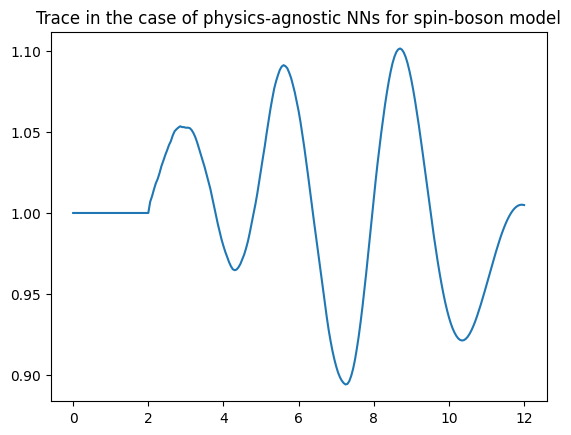

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
xx = np.load('trace_conservation/test_data/sb/2_epsilon-0.0_Delta-1.0_lambda-0.2_gamma-10.0_beta-0.75.npy')


n_states = 2
xlength = 41
time = 10
time_step = 0.05
time_range=0
tt = time_range

# time range
for i in range(0, xlength + int(time/time_step)-1):
    tt += time_step
    time_range = np.append(time_range, tt)


# trained CNN models
model_1 = tf.keras.models.load_model('sb_model_4_state_1.keras', compile=False)
model_2 = tf.keras.models.load_model('sb_model_4_state_2.keras', compile=False)

models = [model_1, model_2]

x = np.zeros((xlength, n_states), dtype=float)
y = np.zeros((len(time_range), n_states), dtype=float)
yhat = np.zeros((1, n_states), dtype=float)

trace = np.zeros((len(time_range), 1), dtype=float)
labels = [1, 4]

# short time dynamics for input
i = 0
for label in labels:
    x[:,i] = np.real(xx[0:xlength, label])
    i += 1
y[0:xlength, :] = x[:,:]


# trace of the input dynamics
for i in range (0, xlength):
  tr = 0
  for j in labels:
    tr += np.real(xx[i, j])
  trace[i, 0] = tr


print('****************************************************************')
print('Predicting dynamics and ')
print('****************************************************************')

for i in range(xlength, len(time_range)):
    l =0
    for j in range (0, n_states):
        x_pred = x[:, j]
        x_pred = x_pred.reshape(1, x.shape[0], 1) # reshape the input
        yhat[0, j] =  models[l].predict(x_pred, verbose=0)[0][0]
        l += 1

    #
    trace[i, 0] = np.sum(yhat)
    x = np.delete(x, 0, 0)
    x = np.r_[x, yhat]
    y[i, :] = yhat[0, :]

plt.plot(time_range, trace)
plt.title('Trace in the case of physics-agnostic NNs for spin-boson model')
plt.xaxis('time($\Delta$)')
plt.yaxis('Trace')

# Let's do it for FMO complex

In [15]:
! ls trace_conservation/training_data/fmo

physics_agnostic


In [11]:
# input for MLQD package, more details are given at https://github.com/Arif-PhyChem/MLQD

param={
    'n_states': 7,
      'QDmodel': 'createQDmodel',     # str: create QD model. The dafault option is useQDmodel
      'QDmodelType': 'RCDYN',           # str: The type of model. Here KRR and the default option is OSTL
      'prepInput' : 'False',           # str: Prepare input files from the data (Default 'False')
      'XfileIn': 'trace_conservation/training_data/fmo/unconstrained/x',           # str: (Optional) The prepared X file
      'YfileIn': 'trace_conservation/training_data/fmo/unconstrained/y',           # str: (Optional) The prepared Y file
      'hyperParam': 'False',           # str: Default is 'False', we can pass 'True' (optimize the hyperparameters) or 'False' (don't optimize and run with the default values)
      'patience': 30,
      'OptEpochs': 30,
      'TrEpochs': 10,
      'max_evals': 30,
      'systemType': 'FMO',
      'QDmodelOut': 'unconstrained_fmo_model'    # str: (Optional), providing a name to save the model at
      }
quant_dyn(**param)

MLQD is a python package developed for Machine Learning-based Quantum Dissipative Dynamics,
 				  Version 1.1.1
			 https://github.com/Arif-PhyChem/MLQD

 			 Copyright (c) 2023 Arif Ullah

All rights reserved. This work is licensed under the Apache Software License 2.0


The above copyright notice and this permission notice shall be included 
in all copies or substantial portions of the Software.


The software is provided "as is" without warranty of any kind, express or implied, 
including but not limited to the warranties ofmerchantability, fitness for a particular 
purpose and noninfringement. In no event shall the authors or copyright holders be 
liable for any claim, damages or other liability, whether in an action of contract, tort or otherwise, 
arising from, out of or in connection with the software or the use or other dealings in the software.


				 Cite as:

1) Ullah A. and Dral P. O., Computer Physics Communications, 2023, 294, 108940
2) Ullah A. and Dral P. O., New Journ

ValueError: Data: file name trace_conservation/training_data/fmo/unconstrained/x.npy does not exist